<a href="https://colab.research.google.com/github/barsha0518/barsha-_ML_1st_lab_assignment/blob/main/labagg_5_barsha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets

iris = datasets.load_iris()

In [2]:
import pandas as pd


In [3]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target


In [4]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
null_values = iris_df.isnull().sum()

print(null_values)


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [7]:
X_train, X_test, y_train, y_test = train_test_split(iris_df.drop(columns='species'), iris_df['species'], test_size=0.2, random_state=42)
log_reg = LogisticRegression(multi_class='ovr', max_iter=200)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 96.67%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


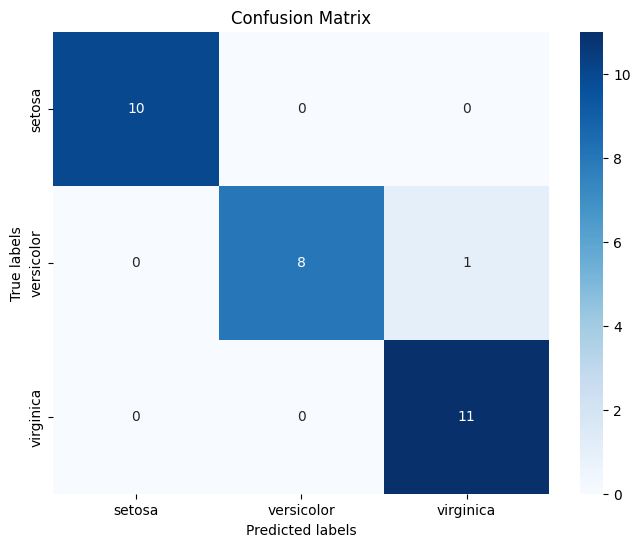

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [11]:
wedf=pd.read_csv('/content/weather (1).csv')

In [12]:
wedf.head()

,Outlook,Temp,Humidity,Windy,Play
0,rainy,hot,high,0,0
1,rainy,hot,high,1,0
2,overcast,hot,high,0,1
3,sunny,mild,high,0,1
4,sunny,cool,normal,0,1


In [13]:
df_encoded = pd.get_dummies(wedf, columns=['Outlook', 'Temp', 'Humidity']).astype(int)

In [14]:

df_encoded.head()


,Windy,Play,Outlook_overcast,Outlook_rainy,Outlook_sunny,Temp_cool,Temp_hot,Temp_mild,Humidity_high,Humidity_normal
0,0,0,0,1,0,0,1,0,1,0
1,1,0,0,1,0,0,1,0,1,0
2,0,1,1,0,0,0,1,0,1,0
3,0,1,0,0,1,0,0,1,1,0
4,0,1,0,0,1,1,0,0,0,1


In [15]:
y=df_encoded['Play']
x=df_encoded.drop(columns='Play',axis=1)

In [16]:
x.head()

,Windy,Outlook_overcast,Outlook_rainy,Outlook_sunny,Temp_cool,Temp_hot,Temp_mild,Humidity_high,Humidity_normal
0,0,0,1,0,0,1,0,1,0
1,1,0,1,0,0,1,0,1,0
2,0,1,0,0,0,1,0,1,0
3,0,0,0,1,0,0,1,1,0
4,0,0,0,1,1,0,0,0,1


In [17]:

y.head()

,Play
0,0
1,0
2,1
3,1
4,1


In [18]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_output,test_output = train_test_split(x,y, test_size=0.2, random_state=42)

In [19]:

from sklearn.tree import DecisionTreeClassifier

In [20]:
treemodel=DecisionTreeClassifier()

In [21]:
treemodels=DecisionTreeClassifier(criterion="entropy")

In [22]:
treemodels.fit(train_data,train_output)

DecisionTreeClassifier(criterion='entropy')

Accuracy: 0.60


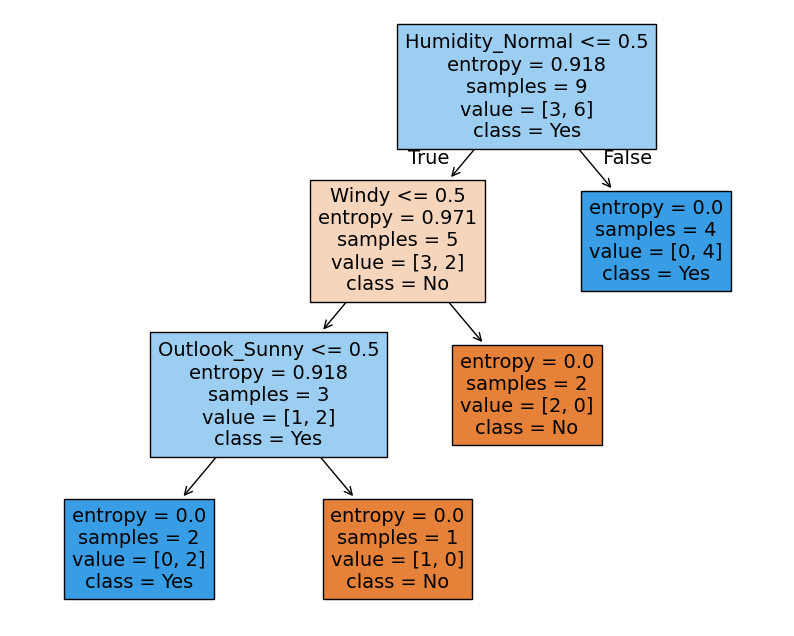

Accuracy with Gini index: 0.60


In [34]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

data = {'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
        'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
        'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
        'Windy': [False, True, False, False, False, True, True, False, False, False, True, True, False, True],
        'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']}

df = pd.DataFrame(data)

df_encoded = pd.get_dummies(df[['Outlook', 'Temperature', 'Humidity', 'Windy']], drop_first=True)

y = df['PlayTennis'].apply(lambda x: 1 if x == 'Yes' else 0)
s
X_train, X_test, y_train, y_test = train_test_split(df_encoded, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=2, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

plt.figure(figsize=(10, 8))
tree.plot_tree(clf, feature_names=df_encoded.columns, class_names=['No', 'Yes'], filled=True)
plt.show()

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_leaf=3, random_state=42)
clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)
print(f'Accuracy with Gini index: {accuracy_score(y_test, y_pred_gini):.2f}')


ques2


Accuracy: 98.06%


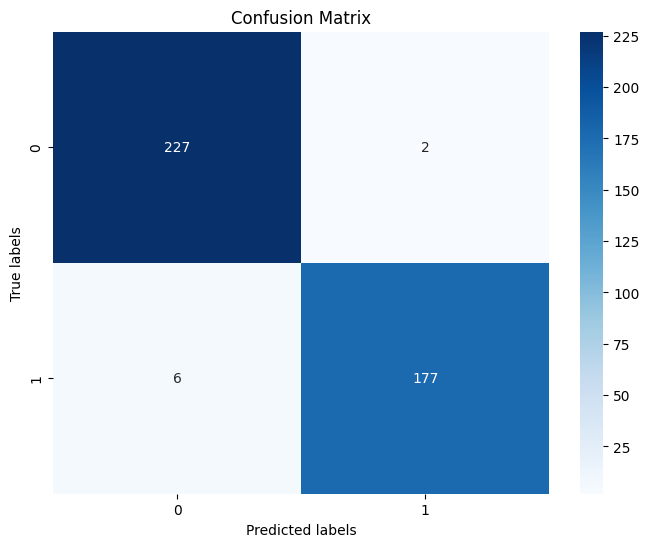

In [9]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

url = 'https://drive.google.com/uc?id=12r4j7yjGC4s_TigKEHyISSY1NSPzF3eX'
data = pd.read_csv(url)

data.columns = ['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class']

X = data[['Variance', 'Skewness', 'Curtosis', 'Entropy']]
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(criterion='gini', random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()